# 02 - Transistors Model for not uniform wafer (variant Vt property)

Definicion de variables para simular la el Vt que varia sobre una oblea

In [2]:
from IPython.core.display import Image, display
display(Image(url='images/TipicalValuesLongChannel.png'))

Variacion por cuadro de Vt del 0.0004%

In [34]:
%matplotlib inline
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pylab as plb
def matrix(m_length,m_width):
    "Return matrix with no homogeneus resitivity"
    m = np.zeros((m_length,m_width))
    return m
Material_length=963e-6
scmos_process = 3.e-6
wafer_thickness = 0.05e-6
Vt_n_base = 800e-3
Vt_p_base = 900e-3
size_m = Material_length/scmos_process
delta_Vt=0.32e-3
plt.style.use('ggplot')

Matriz de Vt ideal Vt_n_Ideal

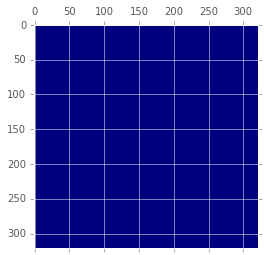

In [35]:
Vt_n_Ideal = matrix(int(size_m),int(size_m))
for i in range(0,int(math.sqrt(Vt_n_Ideal.size))):
    for j in range(0,int(math.sqrt(Vt_n_Ideal.size))):
        Vt_n_Ideal[i][j]= Vt_n_base
        
plt.matshow(Vt_n_Ideal)
plt.show()

Matriz de Vt ideal Vt_p_Ideal

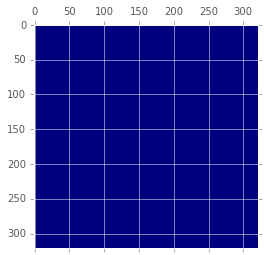

In [36]:
Vt_p_Ideal = matrix(int(size_m),int(size_m))
for i in range(0,int(math.sqrt(Vt_p_Ideal.size))):
    for j in range(0,int(math.sqrt(Vt_p_Ideal.size))):
        Vt_p_Ideal[i][j]= Vt_p_base
        
plt.matshow(Vt_p_Ideal)
plt.show()

OPCION 1 Creacion de las matrices del material con variaciones en Vt_n y Vt_p a partir de la esquina

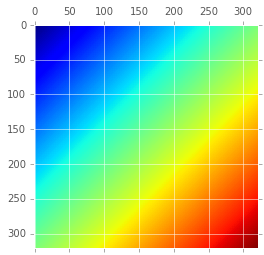

In [37]:
Vt_n = matrix(int(size_m),int(size_m))
def set_corner_Vt_n():
    for i in range(0,int(math.sqrt(Vt_n.size))):
        for j in range(0,int(math.sqrt(Vt_n.size))):
            Vt_n[i][j]= Vt_n_base+(i+j)*delta_Vt
set_corner_Vt_n()            
plt.matshow(Vt_n)
plt.show()

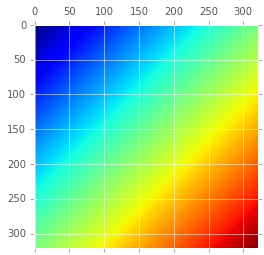

In [38]:
Vt_p = matrix(int(size_m),int(size_m))
def set_corner_Vt_p():
    for i in range(0,int(math.sqrt(Vt_p.size))):
        for j in range(0,int(math.sqrt(Vt_p.size))):
            Vt_p[i][j]= Vt_p_base+(i+j)*delta_Vt
set_corner_Vt_p()
plt.matshow(Vt_p)
plt.show()

OPCION 2 Creacion de las matrices del material con variaciones en Vt_n y Vt_p del centro hacia afuera

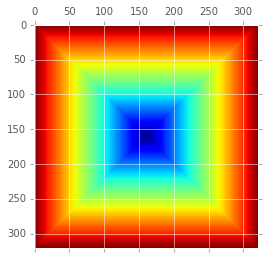

In [39]:
Vt_n = matrix(int(size_m),int(size_m))
def centroid_Vt_n(center,i,j):
    "Return a value of Vt_n for a single shape"
    difJ=abs(center-j)
    difI=abs(center-i)
    xy=0
    if difJ > difI:
        xy=difJ
    else:
        xy=difI
    Vtn= Vt_n_base+(xy)*delta_Vt
        
    return Vtn
def set_centroid_Vt_n():
    for i in range(0,int(math.sqrt(Vt_n.size))):
        for j in range(0,int(math.sqrt(Vt_n.size))):
            Vt_n[i][j]= centroid_Vt_n((int(math.sqrt(Vt_n.size))-1)/2,i,j)
set_centroid_Vt_n()
plt.matshow(Vt_n)
plt.show()

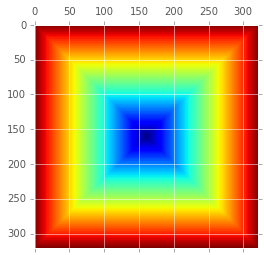

In [40]:
Vt_p = matrix(int(size_m),int(size_m))
def centroid_Vt_p(center,i,j):
    "Return a value of Vt_p for a single shape"
    difJ=abs(center-j)
    difI=abs(center-i)
    xy=0
    if difJ > difI:
        xy=difJ
    else:
        xy=difI
    Vtp= Vt_p_base+(xy)*delta_Vt
        
    return Vtp
def set_centroid_Vt_p():
    for i in range(0,int(math.sqrt(Vt_p.size))):
        for j in range(0,int(math.sqrt(Vt_p.size))):
            Vt_p[i][j]= centroid_Vt_p((int(math.sqrt(Vt_p.size))-1)/2,i,j)
set_centroid_Vt_p()
plt.matshow(Vt_p)
plt.show()

Inicializando la matriz de dibujo en el material

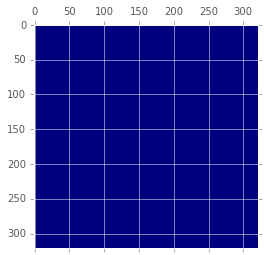

In [41]:
paint_matrix = matrix(int(size_m),int(size_m))
plt.matshow(paint_matrix)
plt.show()

Ingrese las dimensiones LxW de los transistores

In [42]:
display(Image(url='images/WLCMOS.png'))

In [43]:
W_base=2
WTA=60
WTB=60
WTC=60
WTD=60
lenght_active_si_transistor = 6
L=2

In [61]:
display(Image(url='images/Transistor.png'))
print("W_base de 2 unidades")

W_base de 2 unidades


OPCION 1 de Diseño de los transistores con centroide comun

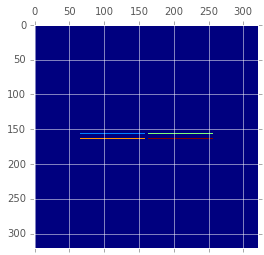

In [45]:
paint_matrix = matrix(int(size_m),int(size_m))
M_center=int((int(math.sqrt(paint_matrix.size))-1)/2)

TA = matrix(W_base,int((WTA/W_base+1)*(lenght_active_si_transistor/2)))
for i in range(M_center-2-TA.shape[0],M_center-2):
    for j in range(M_center-2-TA.shape[1],M_center-2):
        paint_matrix[i][j]=1
        
TB = matrix(W_base,int((WTB/W_base+1)*(lenght_active_si_transistor/2)))
for i in range(M_center-2-TB.shape[0],M_center-2):
    for j in range(M_center+3,TB.shape[1]+M_center+3):
        paint_matrix[i][j]=2
        
TC = matrix(W_base,int((WTC/W_base+1)*(lenght_active_si_transistor/2)))
for i in range(M_center+3,TC.shape[0]+M_center+3):
    for j in range(M_center-2-TC.shape[1],M_center-2):
        paint_matrix[i][j]=3
        
TD = matrix(W_base,int((WTD/W_base+1)*(lenght_active_si_transistor/2)))
for i in range(M_center+3,TD.shape[0]+M_center+3):
    for j in range(M_center+3,TD.shape[1]+M_center+3):
        paint_matrix[i][j]=4
#paint_matrix[3:6,7]=RA
#paint_matrix[3:6,9]=RC
plt.matshow(paint_matrix)
plt.show()

Calculo del valor promedio de Vt para cada transistor

In [46]:
def prom_Vt_n_for_transistor(transistor_num):
    "Return a prom value of Vt_n for a single transistor in the wafer"
    Vtn_sum=0
    Vtn_found=0
    for i in range(0,int(math.sqrt(paint_matrix.size))):
        for j in range(0,int(math.sqrt(paint_matrix.size))):
            if paint_matrix[i][j] == transistor_num:
                Vtn_sum += Vt_n[i][j]
                Vtn_found += 1
                
    Vtn_prom=Vtn_sum/(Vtn_found)

        
    return Vtn_prom
def prom_Vt_p_for_transistor(transistor_num):
    "Return a prom value of Vt_n for a single transistor in the wafer"
    Vtp_sum=0
    Vtp_found=0
    for i in range(0,int(math.sqrt(paint_matrix.size))):
        for j in range(0,int(math.sqrt(paint_matrix.size))):
            if paint_matrix[i][j] == transistor_num:
                Vtp_sum += Vt_p[i][j]
                Vtp_found += 1
                
    Vtp_prom=Vtp_sum/(Vtp_found)

        
    return Vtp_prom

Con variacion de variacion a partir de la esquina de Vt en la oblea

In [47]:
set_corner_Vt_n()

Vtn_T1=prom_Vt_n_for_transistor(1)
Vtn_T2=prom_Vt_n_for_transistor(2)
Vtn_T3=prom_Vt_n_for_transistor(3)
Vtn_T4=prom_Vt_n_for_transistor(4)


print("Vt_n Transistor 1: "+str(Vtn_T1))
print("Vt_n Transistor 2: "+str(Vtn_T2))
print("Vt_n Transistor 3: "+str(Vtn_T3))
print("Vt_n Transistor 4: "+str(Vtn_T4))

set_corner_Vt_p()

Vtp_T1=prom_Vt_p_for_transistor(1)
Vtp_T2=prom_Vt_p_for_transistor(2)
Vtp_T3=prom_Vt_p_for_transistor(3)
Vtp_T4=prom_Vt_p_for_transistor(4)


print("Vt_p Transistor 1: "+str(Vtp_T1))
print("Vt_p Transistor 2: "+str(Vtp_T2))
print("Vt_p Transistor 3: "+str(Vtp_T3))
print("Vt_p Transistor 4: "+str(Vtp_T4))

Vt_n Transistor 1: 0.8856
Vt_n Transistor 2: 0.91696
Vt_n Transistor 3: 0.88784
Vt_n Transistor 4: 0.9192
Vt_p Transistor 1: 0.9856
Vt_p Transistor 2: 1.01696
Vt_p Transistor 3: 0.98784
Vt_p Transistor 4: 1.0192


Con variacion del centro hacia afuera de Vt en la oblea

In [48]:
set_centroid_Vt_n()
Vtn_T1=prom_Vt_n_for_transistor(1)
Vtn_T2=prom_Vt_n_for_transistor(2)
Vtn_T3=prom_Vt_n_for_transistor(3)
Vtn_T4=prom_Vt_n_for_transistor(4)


print("Vt_n Transistor 1: "+str(Vtn_T1))
print("Vt_n Transistor 2: "+str(Vtn_T2))
print("Vt_n Transistor 3: "+str(Vtn_T3))
print("Vt_n Transistor 4: "+str(Vtn_T4))

set_centroid_Vt_p()

Vtp_T1=prom_Vt_p_for_transistor(1)
Vtp_T2=prom_Vt_p_for_transistor(2)
Vtp_T3=prom_Vt_p_for_transistor(3)
Vtp_T4=prom_Vt_p_for_transistor(4)


print("Vt_p Transistor 1: "+str(Vtp_T1))
print("Vt_p Transistor 2: "+str(Vtp_T2))
print("Vt_p Transistor 3: "+str(Vtp_T3))
print("Vt_p Transistor 4: "+str(Vtp_T4))

Vt_n Transistor 1: 0.81568172043
Vt_n Transistor 2: 0.81568172043
Vt_n Transistor 3: 0.81568172043
Vt_n Transistor 4: 0.81568172043
Vt_p Transistor 1: 0.91568172043
Vt_p Transistor 2: 0.91568172043
Vt_p Transistor 3: 0.91568172043
Vt_p Transistor 4: 0.91568172043


# NGSPICE Simulations - 01 Current Mirror

Circuitos a simular:

In [49]:
display(Image(url='images/espejo_n.png'))
print("Espejo NMOS")

Espejo NMOS


In [50]:
display(Image(url='images/espejo_p.png'))
print("Espejo PMOS")

Espejo PMOS


Funcion para editar los archivo de simulacion del espejo NMOS 'espejoNmosPythonFile.cir' y el espejo P 'espejoPmosPythonFile.cir'

In [51]:
import sys
import fileinput
def modificar_cir_Espejo_NMOS(W,L,Vt_T1,Vt_T2):
    text="* Simulación Circuito Espejo de Corriente con Ncmos, valores reales de Kp_n y Vt"+"\n"+ \
    "* Universidad Nacional de Colombia 2016"+"\n"+ \
    "* CMOS Analógico"+"\n"+ \
    "* Grupo Jorge Garzón, Esteban Iafrancesco A"+"\n"+ \
    "\n"+\
    "VDD VDD 0 DC 10 AC 0"+"\n"+\
    "V2 VR 0 DC 10 AC 0"+"\n"+\
    "VRD RDN VR DC 0 AC 0"+"\n"+\
    "RD RDN DRAIN 1000"+"\n"+\
    "RP VDD GATE 2000"+"\n"+\
    "M1 DRAIN GATE 0 0 nmosideal W="+str(W)+" L="+str(L)+"\n"+\
    "M2 GATE GATE 0 0 nmosideal W="+str(W)+" L="+str(L)+"\n"+\
    "\n"+\
    "VRD2 RDN2 VR DC 0 AC 0"+"\n"+\
    "RD2 RDN2 DRAIN2 1000"+"\n"+\
    "RP2 VDD GATE2 2000"+"\n"+\
    "M3 DRAIN2 GATE2 0 0 nmos1 W="+str(W)+" L="+str(L)+"\n"+\
    "M4 GATE2 GATE2 0 0 nmos2 W="+str(W)+" L="+str(L)+"\n"+\
    "\n"+\
    ".model nmosideal nmos LEVEL=1 Vto=0.8 KP=120u LAMBDA=0.01 U0=650"+"\n"+\
    ".model nmos1 nmos LEVEL=1 Vto="+str(Vt_T1)+" KP=120u LAMBDA=0.01 U0=650"+"\n"+\
    ".model nmos2 nmos LEVEL=1 Vto="+str(Vt_T2)+" KP=120u LAMBDA=0.01 U0=650"+"\n"+\
    "\n"+\
    ".control"+"\n"+\
    "set color0 =white"+"\n"+\
    "set color1=black"+"\n"+\
    "op"+"\n"+\
    "show all"+"\n"+\
    "dc vdd 0.7 12 0.01"+"\n"+\
    "plot i(vrd) i(vrd2)"+"\n"+\
    ".endc"+"\n"
    for i, line in enumerate(fileinput.input('../spice-simulations/espejoNmosPythonFile.cir', inplace=1)):
        if i == 1: sys.stdout.write(text) # replace 'sit' and write
    fileinput.close()
def modificar_cir_Espejo_PMOS(W,L,Vt_T1,Vt_T2):
    text="* Simulación Circuito Espejo de Corriente con Ncmos, valores reales de Kp_n y Vt"+"\n"+ \
    "* Universidad Nacional de Colombia 2016"+"\n"+ \
    "* CMOS Analógico"+"\n"+ \
    "* Grupo Jorge Garzón, Esteban Iafrancesco A"+"\n"+ \
    "\n"+\
    "VDD VDD 0 DC -10 AC 0"+"\n"+\
    "V2 VR 0 DC -10 AC 0"+"\n"+\
    "VRD RDN VR DC 0 AC 0"+"\n"+\
    "RD RDN DRAIN 1000"+"\n"+\
    "RP VDD GATE 2000"+"\n"+\
    "M1 DRAIN GATE 0 0 pmosideal W="+str(W)+" L="+str(L)+"\n"+\
    "M2 GATE GATE 0 0 pmosideal W="+str(W)+" L="+str(L)+"\n"+\
    "\n"+\
    "VRD2 RDN2 VR DC 0 AC 0"+"\n"+\
    "RD2 RDN2 DRAIN2 1000"+"\n"+\
    "RP2 VDD GATE2 2000"+"\n"+\
    "M3 DRAIN2 GATE2 0 0 pmos1 W="+str(W)+" L="+str(L)+"\n"+\
    "M4 GATE2 GATE2 0 0 pmos2 W="+str(W)+" L="+str(L)+"\n"+\
    "\n"+\
    ".model pmosideal pmos LEVEL=1 Vto=-0.9 KP=40u LAMBDA=0.0125 U0=250"+"\n"+\
    ".model pmos1 pmos LEVEL=1 Vto=-"+str(Vt_T1)+" KP=40u LAMBDA=0.0125 U0=250"+"\n"+\
    ".model pmos2 pmos LEVEL=1 Vto=-"+str(Vt_T2)+" KP=40u LAMBDA=0.0125 U0=250"+"\n"+\
    "\n"+\
    ".control"+"\n"+\
    "set color0 =white"+"\n"+\
    "set color1=black"+"\n"+\
    "op"+"\n"+\
    "show all"+"\n"+\
    "dc vdd -0.8 -12 -0.01"+"\n"+\
    "plot i(vrd) i(vrd2)"+"\n"+\
    ".endc"+"\n"
    for i, line in enumerate(fileinput.input('../spice-simulations/espejoPmosPythonFile.cir', inplace=1)):
        if i == 1: sys.stdout.write(text) # replace 'sit' and write
    fileinput.close()

# Espejo NMOS con variaciones en la oblea desde la esquina

Simulacion con variacion desde el centro de Vt_n en la oblea y centroide comun entre 2 transistores (de los 4 disponibles) para formar el espejo de corriente.

In [52]:
set_corner_Vt_n()

Vtn_T1=prom_Vt_n_for_transistor(1)
Vtn_T2=prom_Vt_n_for_transistor(2)
Vtn_T3=prom_Vt_n_for_transistor(3)
Vtn_T4=prom_Vt_n_for_transistor(4)

#modificar_cir_Espejo_NMOS(WTA,L,Vtn_T1,Vtn_T2)

In [55]:
display(Image(url='images/corner_Vt_TA_TB_n.png'))
print("VDD vs -Iout. Rojo Espejo ideal, Azul Espejo Con variaciones en Vt_n de la oblea. Transistores TA y TB")

VDD vs -Iout. Rojo Espejo ideal, Azul Espejo Con variaciones en Vt_n de la oblea. Transistores TA y TB


In [56]:
#modificar_cir_Espejo_NMOS(WTA,L,Vtn_T1,Vtn_T3)

In [58]:
display(Image(url='images/corner_Vt_TA_TC_n.png'))
print("VDD vs -Iout. Rojo Espejo ideal, Azul Espejo Con variaciones en Vt_n de la oblea. Transistores TA y TC")

VDD vs -Iout. Rojo Espejo ideal, Azul Espejo Con variaciones en Vt_n de la oblea. Transistores TA y TC


In [59]:
#modificar_cir_Espejo_NMOS(WTA,L,Vtn_T2,Vtn_T3)

In [60]:
display(Image(url='images/corner_Vt_TB_TC_n.png'))
print("VDD vs -Iout. Rojo Espejo ideal, Azul Espejo Con variaciones en Vt_n de la oblea. Transistores TB y TC")

VDD vs -Iout. Rojo Espejo ideal, Azul Espejo Con variaciones en Vt_n de la oblea. Transistores TB y TC


# Espejo PMOS con variaciones en la oblea desde la esquina

Simulacion con variacion desde la esquina de Vt_p en la oblea y centroide comun entre 2 transistores (de los 4 disponibles) para formar el espejo de corriente.

In [62]:
set_corner_Vt_p()

Vtp_T1=prom_Vt_p_for_transistor(1)
Vtp_T2=prom_Vt_p_for_transistor(2)
Vtp_T3=prom_Vt_p_for_transistor(3)
Vtp_T4=prom_Vt_p_for_transistor(4)

#modificar_cir_Espejo_PMOS(WTA,L,Vtp_T1,Vtp_T2)

In [63]:
display(Image(url='images/corner_Vt_TA_TB_p.png'))
print("VDD vs -Iout. Rojo Espejo ideal PMOS, Azul Espejo Con variaciones en Vt_p de la oblea. Transistores TA y TB")

VDD vs -Iout. Rojo Espejo ideal PMOS, Azul Espejo Con variaciones en Vt_p de la oblea. Transistores TA y TB


In [64]:
#modificar_cir_Espejo_PMOS(WTA,L,Vtp_T1,Vtp_T3)

In [65]:
display(Image(url='images/corner_Vt_TA_TC_p.png'))
print("VDD vs -Iout. Rojo Espejo ideal PMOS, Azul Espejo Con variaciones en Vt_p de la oblea. Transistores TA y TC")

VDD vs -Iout. Rojo Espejo ideal PMOS, Azul Espejo Con variaciones en Vt_p de la oblea. Transistores TA y TC


In [66]:
#modificar_cir_Espejo_PMOS(WTA,L,Vtp_T2,Vtp_T3)

In [67]:
display(Image(url='images/corner_Vt_TB_TC_p.png'))
print("VDD vs -Iout. Rojo Espejo ideal PMOS, Azul Espejo Con variaciones en Vt_p de la oblea. Transistores TB y TC")

VDD vs -Iout. Rojo Espejo ideal PMOS, Azul Espejo Con variaciones en Vt_p de la oblea. Transistores TB y TC
